In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl

In [2]:
import os

In [5]:
files = [file for file in os.listdir('E:\Machine learning\Data analysis\sales_analysis\Sales_Data')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [8]:
all_data = pd.DataFrame()
path ='E:\Machine learning\Data analysis\sales_analysis\Sales_Data'
for file in files:
    data = pd.read_csv(path+'/'+file)
    all_data = pd.concat([data,all_data]) 

In [9]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [10]:
all_data.shape

(186850, 6)

In [12]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [25]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [26]:
all_data = all_data.dropna(how='all')
all_data.shape

(186305, 6)

In [21]:
all_data.reset_index(drop=True, inplace=True)

In [24]:
all_data['Order Date'][1].split(' ')

['09/29/19', '10:19']

In [28]:
def month(x):
    return x.split('/')[0]

In [29]:
all_data['month'] = all_data['Order Date'].apply(month)

<ipython-input-29-f79c1136703a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['month'] = all_data['Order Date'].apply(month)


In [30]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


In [31]:
all_data['month'].unique()

array(['09', '10', 'Order Date', '11', '12', '05', '06', '03', '04', '07',
       '08', '01', '02'], dtype=object)

In [32]:
filter = all_data['month'] == 'Order Date'
all_data=all_data[~filter]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


In [33]:
all_data['month'] = all_data['month'].astype(int)

<ipython-input-33-f52db1b55b36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['month'] = all_data['month'].astype(int)


In [34]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int32
dtype: object

In [36]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

<ipython-input-36-d02f96f4193c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
<ipython-input-36-d02f96f4193c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = all_data['Price Each'].astype(float)


In [37]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
dtype: object

In [38]:
all_data['sales'] = all_data['Price Each']*all_data['Quantity Ordered']

<ipython-input-38-25607bb8785f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['sales'] = all_data['Price Each']*all_data['Quantity Ordered']


In [39]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95


In [40]:
all_data.groupby('month')['sales'].sum()

month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sales, dtype: float64

([<matplotlib.axis.XTick at 0x112bd370>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

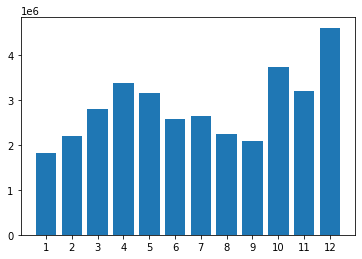

In [42]:
months=range(1,13)
plt.bar(months,all_data.groupby('month')['sales'].sum())
plt.xticks(months)

In [46]:
all_data['Purchase Address'][0].split(', ')[1]

'Los Angeles'

In [47]:
def city(x):
    return x.split(', ')[1]

In [48]:
all_data['city'] = all_data['Purchase Address'].apply(city)

<ipython-input-48-8f3dec7bb684>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['city'] = all_data['Purchase Address'].apply(city)


In [49]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta


In [50]:
all_data['city'].unique()

array(['Los Angeles', 'Austin', 'Seattle', 'Atlanta', 'Portland',
       'New York City', 'San Francisco', 'Boston', 'Dallas'], dtype=object)

<AxesSubplot:xlabel='city'>

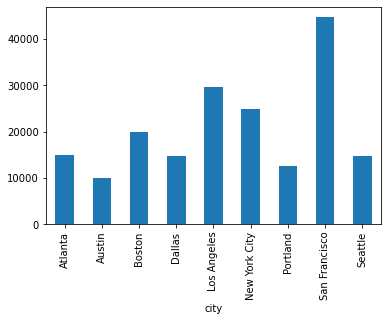

In [53]:
all_data.groupby('city')['city'].count().plot.bar()

In [54]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

<ipython-input-54-8efe3b8cd50a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour


In [55]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin,10
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19


In [59]:
keys = []
hour = []
for key,df_hour in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(df_hour))    

In [60]:
keys

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [61]:
hour

[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

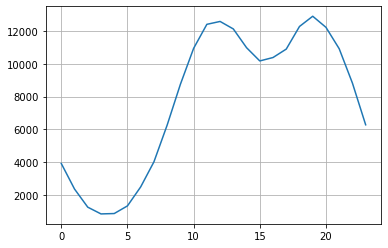

In [62]:
plt.grid()
plt.plot(keys,hour)

In [65]:
all_data['Product'].unique()

array(['AA Batteries (4-pack)', 'USB-C Charging Cable',
       '27in FHD Monitor', '34in Ultrawide Monitor',
       'Lightning Charging Cable', 'Vareebadd Phone', 'Wired Headphones',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Google Phone', '20in Monitor', 'Bose SoundSport Headphones',
       'iPhone', 'ThinkPad Laptop', 'Macbook Pro Laptop', 'Flatscreen TV',
       '27in 4K Gaming Monitor', 'LG Dryer', 'LG Washing Machine'],
      dtype=object)

<AxesSubplot:xlabel='Product'>

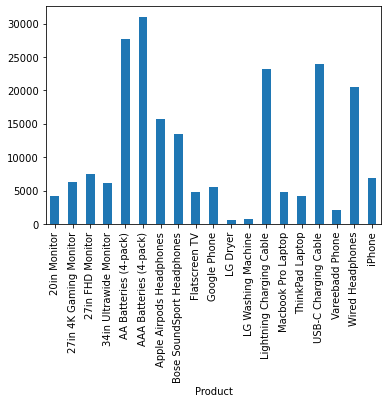

In [67]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot.bar()

In [69]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [71]:
product = all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity = all_data.groupby('Product')['Quantity Ordered'].sum()
price = all_data.groupby('Product')['Price Each'].mean()

<ipython-input-75-23dbb1e09f58>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product,rotation='vertical',size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

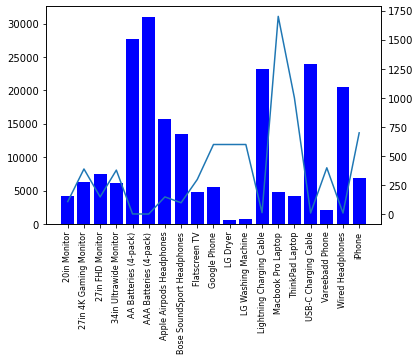

In [75]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product,quantity,color='b')
ax2.plot(product,price)
ax1.set_xticklabels(product,rotation='vertical',size=8)

In [76]:
#check which products are sold together

In [77]:
df = all_data['Order ID'].duplicated(keep=False)
df2= all_data[df]
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
20,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001",9,11.95,New York City,15
21,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001",9,11.95,New York City,15
60,248210,iPhone,1,700.00,09/27/19 10:33,"292 Washington St, San Francisco, CA 94016",9,700.00,San Francisco,10
61,248210,Lightning Charging Cable,1,14.95,09/27/19 10:33,"292 Washington St, San Francisco, CA 94016",9,14.95,San Francisco,10
70,248219,Bose SoundSport Headphones,1,99.99,09/24/19 12:48,"665 Maple St, Los Angeles, CA 90001",9,99.99,Los Angeles,12


In [79]:
#grouped all the order ids and set it them together.
df2['grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

<ipython-input-79-efed0892d1da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [80]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,grouped
20,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001",9,11.95,New York City,15,"USB-C Charging Cable,USB-C Charging Cable"
21,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001",9,11.95,New York City,15,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,iPhone,1,700.00,09/27/19 10:33,"292 Washington St, San Francisco, CA 94016",9,700.00,San Francisco,10,"iPhone,Lightning Charging Cable"
61,248210,Lightning Charging Cable,1,14.95,09/27/19 10:33,"292 Washington St, San Francisco, CA 94016",9,14.95,San Francisco,10,"iPhone,Lightning Charging Cable"
70,248219,Bose SoundSport Headphones,1,99.99,09/24/19 12:48,"665 Maple St, Los Angeles, CA 90001",9,99.99,Los Angeles,12,"Bose SoundSport Headphones,Google Phone"


In [82]:
df2 = df2.drop_duplicates(subset ='Order ID')
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,grouped
20,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001",9,11.95,New York City,15,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,iPhone,1,700.00,09/27/19 10:33,"292 Washington St, San Francisco, CA 94016",9,700.00,San Francisco,10,"iPhone,Lightning Charging Cable"
70,248219,Bose SoundSport Headphones,1,99.99,09/24/19 12:48,"665 Maple St, Los Angeles, CA 90001",9,99.99,Los Angeles,12,"Bose SoundSport Headphones,Google Phone"
117,248265,Vareebadd Phone,1,400.00,09/24/19 14:07,"939 14th St, San Francisco, CA 94016",9,400.00,San Francisco,14,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,Google Phone,1,600.00,09/30/19 20:36,"725 10th St, Portland, OR 97035",9,600.00,Portland,20,"Google Phone,Bose SoundSport Headphones"


In [92]:
df2['grouped'].value_counts()[0:5]


iPhone,Lightning Charging Cable         882
Google Phone,USB-C Charging Cable       856
iPhone,Wired Headphones                 361
Vareebadd Phone,USB-C Charging Cable    312
Google Phone,Wired Headphones           303
Name: grouped, dtype: int64

In [95]:
import plotly.express as px

In [97]:
data = df2['grouped'][0:5]
values = df2['grouped'].value_counts().values[0:5]
names = df2['grouped'].value_counts().index[0:5]

In [98]:
fig = px.pie(data, values = values, names=names )
fig.show()